In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
ebola_df = pd.read_csv('Resources/ebola.csv')
ebola_df

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [3]:
#list of countries
ebola_df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

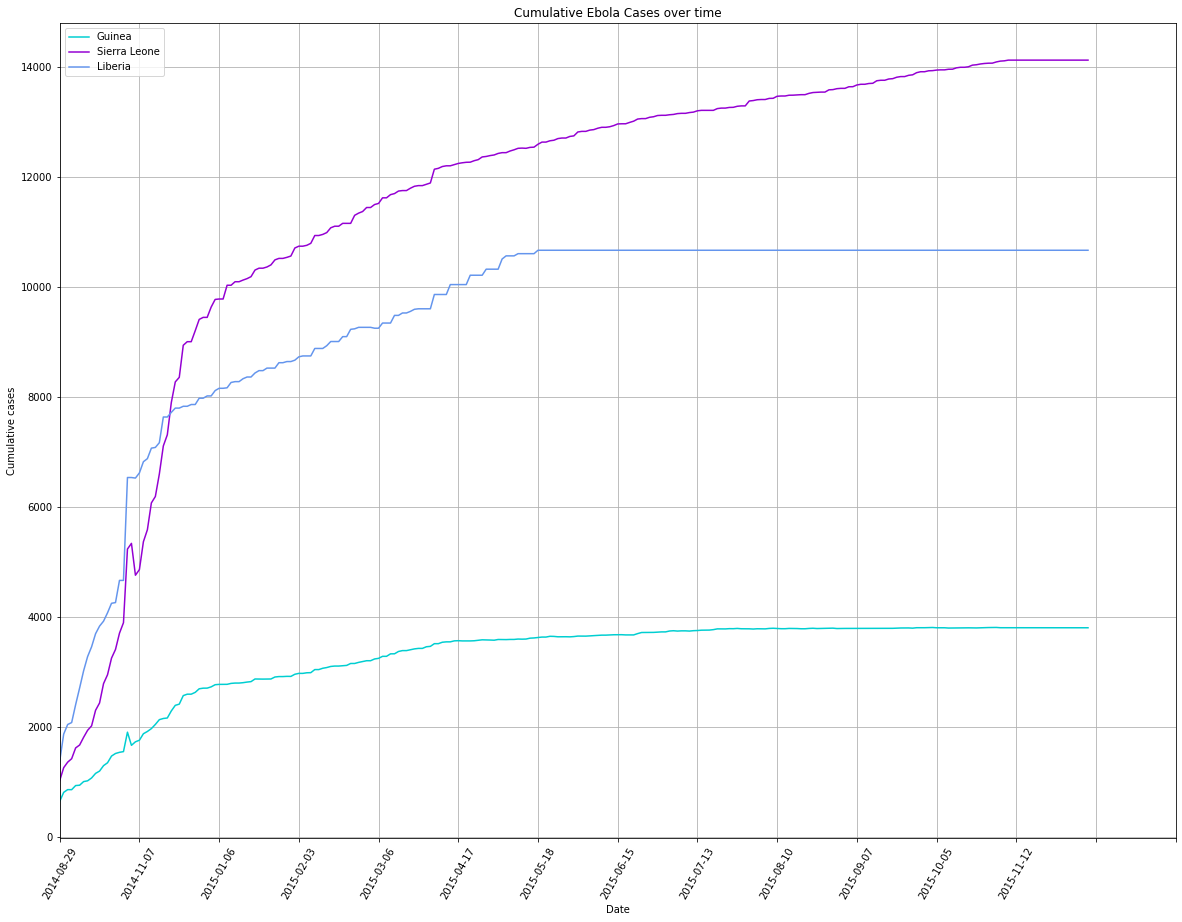

In [4]:
#Cumulative line graph of cases over time per country

#Countries with high number of cases
#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_cases= guinea_df["Cumulative no. of confirmed, probable and suspected cases"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_cases
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")

#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_cases= sierraleone_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_cases
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")

#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=1378]
liberia_cases= liberia_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis4=liberia_df["Date"]
y_axis4=liberia_cases
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")


plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('Cumulative Ebola Cases over time')
plt.xlim(xmin=0)
plt.xticks(np.arange(0, 300, step=20))
plt.xticks(rotation=60,horizontalalignment="center") 

plt.grid()
plt.show()


(0.0, 240)

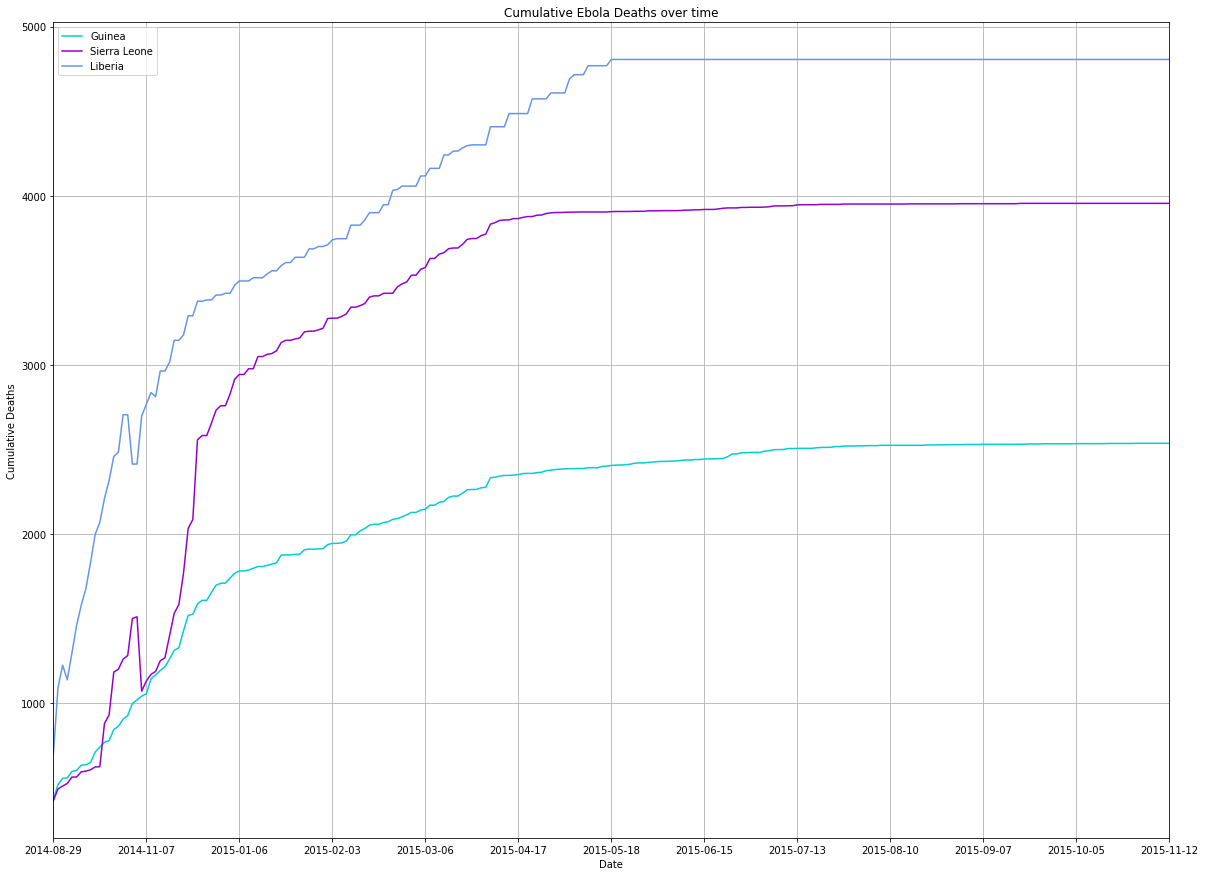

In [5]:
#Cumulative line graph of the number of deaths over time per country

#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_deaths= guinea_df["Cumulative no. of confirmed, probable and suspected deaths"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_deaths
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")
#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_deaths= sierraleone_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_deaths
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")
#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=694]
liberia_deaths= liberia_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis4=liberia_df["Date"]
y_axis4=liberia_deaths
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")

plt.legend(loc="best")
plt.ylabel('Cumulative Deaths')
plt.xlabel("Date")
plt.title('Cumulative Ebola Deaths over time')
plt.xticks(np.arange(0, 300, step=20))
plt.grid()
plt.xlim(xmin=0)
plt.xlim(xmax=240)

In [6]:
#bar chart of total cases per country
top_three=['Liberia', 'Sierra Leone', 'Guinea']
ebola_countries_df=ebola_df[ebola_df.Country.isin(top_three)]
ebola_countries_df
total_cases= ebola_countries_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
total_cases_df = pd.DataFrame(total_cases)
total_cases.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected cases"
0,Guinea,3810.0
1,Liberia,10666.0
2,Sierra Leone,14122.0


Text(0.5, 1.0, 'Total ebola cases per country')

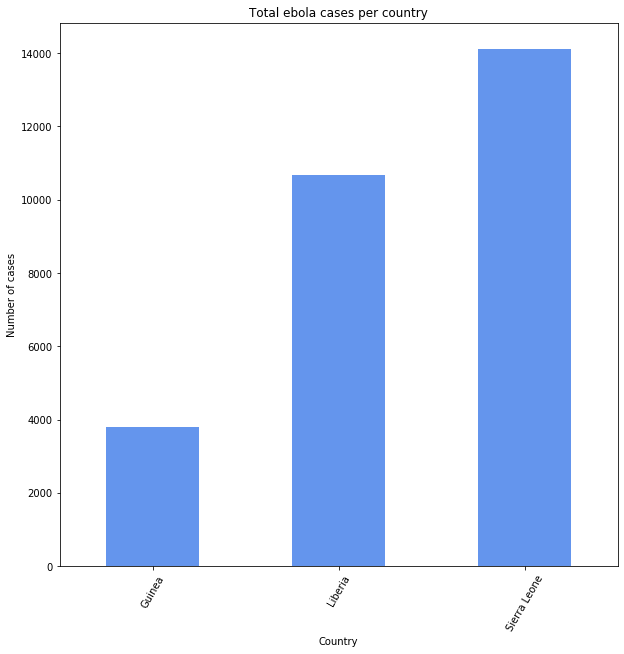

In [7]:
#bar graph
fig= plt.figure(figsize=(10,10))
total_cases.plot(kind="bar", color= 'cornflowerblue')
plt.xlabel("Country")
plt.xticks(rotation=60)
plt.ylabel("Number of cases")
plt.title("Total ebola cases per country")

In [8]:
total_deaths= ebola_countries_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected deaths"].max()
total_deaths_df = pd.DataFrame(total_deaths)
total_deaths_df.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2536.0
1,Liberia,4806.0
2,Sierra Leone,3955.0


Text(0.5, 1.0, 'Total ebola deaths per country')

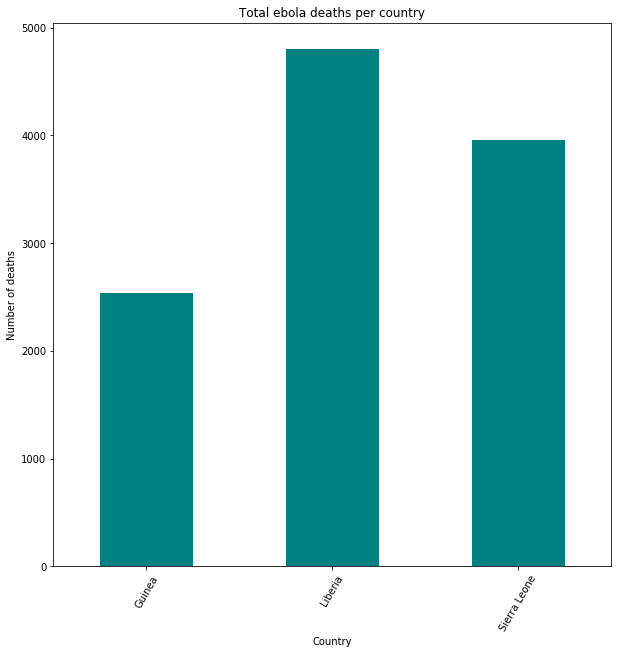

In [9]:
#bar chart deaths
fig= plt.figure(figsize=(10,10))
total_deaths.plot(kind="bar", color= 'teal')
plt.xlabel("Country")
plt.xticks(rotation=60)
plt.ylabel("Number of deaths")
plt.title("Total ebola deaths per country")

In [10]:
death_rate=(total_deaths/total_cases)*100
d = {"Country": ["Guinea","Liberia","Sierra Leone"]}
df = pd.DataFrame(data=d)
df["Death Rate Percent"] = death_rate[0],death_rate[1],death_rate[2]
df

,Country,Death Rate Percent
0,Guinea,66.561680
1,Liberia,45.059066
2,Sierra Leone,28.005948


In [11]:
total_cases_world= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
tot_df = pd.DataFrame(total_cases_world)
tot_df.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected cases"
0,Guinea,3810.0
1,Italy,1.0
2,Liberia,10666.0
3,Mali,8.0
4,Nigeria,22.0
5,Senegal,3.0
6,Sierra Leone,14122.0
7,Spain,1.0
8,United Kingdom,1.0
9,United States of America,4.0


In [12]:
total_cases_sum= total_cases_world.sum()
total_cases_sum

28638.0

In [13]:
total_deaths_world= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected deaths"].max()
tot_death_df = pd.DataFrame(total_deaths_world)
tot_death_df.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2536.0
1,Italy,0.0
2,Liberia,4806.0
3,Mali,6.0
4,Nigeria,8.0
5,Senegal,0.0
6,Sierra Leone,3955.0
7,Spain,0.0
8,United Kingdom,0.0
9,United States of America,1.0


In [14]:
total_deaths_sum= total_deaths_world.sum()
total_deaths_sum

11312.0

In [15]:
avg_death_rate= (total_deaths_sum/total_cases_sum)*100
avg_death_rate.round(2)

39.5

In [16]:
ebola_pop = pd.read_csv('Resources/Population by country.csv')
ebola_pop.rename(columns={"Country Name":"Country"})

,Country,Population (2014)
0,Spain,46480882
1,United Kingdom,64602298
2,Guinea,11150977
3,Italy,60789140
4,Liberia,4359505
5,Mali,16934220
6,Nigeria,176404902
7,Senegal,14174731
8,Sierra Leone,7017144
9,United States of America,318301008


In [17]:
data = {'Country':['Guinea', 'Liberia', 'Sierra Leone'],
        'Cases':[3810, 10666, 14122],
        'Deaths':[2536,4806,3955],
        'Population':[11150977,4359505 ,7017144 ],
        'GDP per capita (USD)':[1064, 621, 504],
        'Hospital beds per 1000 people':[0.3,0.8,0.4]}

# Create DataFrame
cases_per_pop = pd.DataFrame(data)
cases_per_pop

cases_pop_df=cases_per_pop
cases_pop_df['Cases per 10,000 population'] = ((cases_pop_df['Cases'])/(cases_pop_df['Population']))*10000
cases_pop_df['Deaths per 10,000 population'] = ((cases_pop_df['Deaths'])/(cases_pop_df['Population']))*10000
cases_pop_df.round(2)      

,Country,Cases,Deaths,Population,GDP per capita (USD),Hospital beds per 1000 people,"Cases per 10,000 population","Deaths per 10,000 population"
0,Guinea,3810,2536,11150977,1064,0.3,3.42,2.27
1,Liberia,10666,4806,4359505,621,0.8,24.47,11.02
2,Sierra Leone,14122,3955,7017144,504,0.4,20.12,5.64


In [18]:
data2 = {'Country':['Guinea', 'Liberia', 'Sierra Leone', "Canada",'China', 'Hong Kong', 'Singapore', 'Taiwan', 'United States' ],
         'Type': ['Ebola','Ebola','Ebola', 'SARS', 'SARS','SARS','SARS', 'SARS', 'SARS'],
         'Population': [11150977,4359505 ,7017144, 32207113,1286975468, 7394170,4608595,22603001,290342554],
         'GDP per capita (USD)':[1064, 621, 504,46194,10261, 48755, 65233, 24828, 65280],
         'Healthcare Expenditure (% GDP)' :[4.12,8.16,13.42,10.75,5.15,5.9,4.44,6.1,17.06],
         'Pandemic Preparedness Score': [32.7, 35.1,38.2, 75.3, 48.2,48.2,58.7,48.2,83.5],
         'Hospital Beds Per 1000 People':[0.3,0.8,0.4,2.7,4.2,4.9,2.4,5.7,2.9]}

country_data= pd.DataFrame(data2) 
country_data

,Country,Type,Population,GDP per capita (USD),Healthcare Expenditure (% GDP),Pandemic Preparedness Score,Hospital Beds Per 1000 People
0,Guinea,Ebola,11150977,1064,4.12,32.7,0.3
1,Liberia,Ebola,4359505,621,8.16,35.1,0.8
2,Sierra Leone,Ebola,7017144,504,13.42,38.2,0.4
3,Canada,SARS,32207113,46194,10.75,75.3,2.7
4,China,SARS,1286975468,10261,5.15,48.2,4.2
5,Hong Kong,SARS,7394170,48755,5.90,48.2,4.9
6,Singapore,SARS,4608595,65233,4.44,58.7,2.4
7,Taiwan,SARS,22603001,24828,6.10,48.2,5.7
8,United States,SARS,290342554,65280,17.06,83.5,2.9


Ebola is spread through direct contact with body fluids of an infected person. It is not airborne and cannot be spread until a person is showing syptoms of ebola